# Dati epidemiologici per status vaccinale

COPERTURA VACCINALE NELLA POPOLAZIONE ITALIANA DI ETÀ >12 ANNI (AL 10 LUGLIO) E 
CASI DI COVID-19 DIAGNOSTICATI, OSPEDALIZZATI, RICOVERATI IN TERAPIA INTENSIVA E DECEDUTI NEGLI 
ULTIMI 30 GIORNI, PER STATO VACCINALE E CLASSE D’ETÀ.

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import camelot
import re

In [80]:
Data = '28-luglio-2021'

In [81]:
tables = camelot.read_pdf(f'https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-sorveglianza-integrata-COVID-19_{Data}.pdf',pages = '16',  flavor='stream', split_text=False, table_areas=['0,725,540,387'], row_tol=14)
rapporto = tables[0].df
rapporto.set_axis(labels=rapporto.loc[0,:], axis = 1, inplace = True)
rapporto.drop(0, inplace = True)
rapporto.columns = rapporto.columns.str.replace('\n', '')
rapporto.set_index('FASCIA DI ETÀ', inplace = True)

In [82]:
tables = camelot.read_pdf(f'https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-sorveglianza-integrata-COVID-19_{Data}.pdf',pages = '16',  flavor='stream', split_text=False, table_areas=['0,725,195,387'], row_tol=25, strip_text=' .\n')
colonna_date = tables[0].df

In [84]:
for i in [1,2,3]:
    rapporto.iloc[:,i] = rapporto.iloc[:,i].str.replace(r'\(.+\)','').str.replace('\.','').astype(int)

In [85]:
Pop = rapporto.iloc[0:4,1:4]
Pop_data = re.findall(r'\((.+)\)', colonna_date.iloc[1,0])[0]
Diag = rapporto.iloc[4:8,1:4]
Diag_data = re.findall(r'\((.+)\)',colonna_date.iloc[3,0])[0]
Osp = rapporto.iloc[8:12,1:4]
Osp_data = re.findall(r'\((.+)\)',colonna_date.iloc[4,0])[0]
TI = rapporto.iloc[12:16,1:4]
TI_data = re.findall(r'\((.+)\)',colonna_date.iloc[6,0])[0]
Dec = rapporto.iloc[16:20,1:4]
Dec_data = re.findall(r'\((.+)\)',colonna_date.iloc[7,0])[0]

Text(-100, -40, 'Fonte: ISS \nAutore: @lucafilos')

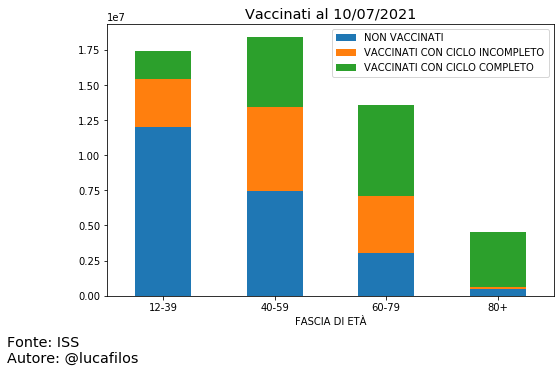

In [96]:
fig, ax = plt.subplots(figsize = (8,5))
Pop.plot.bar(stacked = True, rot = 0, ax=ax, legend = False)
ax.legend()
ax.set_title(f'Vaccinati al {Pop_data}', fontsize = 'x-large')
plt.annotate('Fonte: ISS \nAutore: @lucafilos', (0,0), (-100,-40), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')

Text(-500, -40, 'Fonte: ISS \nAutore: @lucafilos')

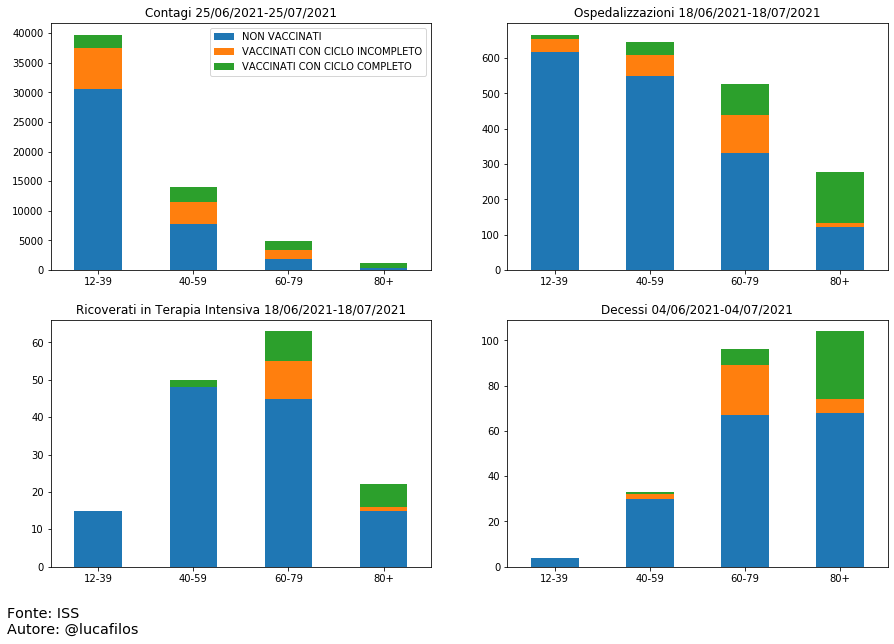

In [101]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
Diag.plot.bar(stacked = True, rot = 0, ax = ax[0,0], legend = False)
Osp.plot.bar(stacked = True, rot = 0, ax = ax[0,1], legend = False)
TI.plot.bar(stacked = True, rot = 0, ax = ax[1,0], legend = False)
Dec.plot.bar(stacked = True, rot = 0, ax = ax[1,1], legend = False)

ax[0,0].legend()
ax[0,0].set_xlabel('')
ax[0,0].set_title(f'Contagi {Diag_data}', fontsize = 'large')

ax[0,1].set_xlabel('')
ax[0,1].set_title(f'Ospedalizzazioni {Osp_data}', fontsize = 'large')

ax[1,0].set_xlabel('')
ax[1,0].set_title(f'Ricoverati in Terapia Intensiva {TI_data}', fontsize = 'large')

ax[1,1].set_xlabel('')
ax[1,1].set_title(f'Decessi {Dec_data}', fontsize = 'large')

plt.annotate('Fonte: ISS \nAutore: @lucafilos', (0,0), (-500,-40), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')

In [90]:
Rischio_contagio = pd.DataFrame()
for status in Pop.columns:
    rischio = Diag[status].sum()/Pop[status].sum()
    Rischio_contagio.loc[status, 'Rischio di contagio'] = rischio
    
for status in Pop.columns:
    Rischio_contagio.loc[status, 'Rischio relativo'] = round(Rischio_contagio.loc[status, 'Rischio di contagio']/Rischio_contagio.loc['VACCINATI CON CICLO COMPLETO', 'Rischio di contagio'],1)
    

In [91]:
Rischio_osped = pd.DataFrame()
for status in Pop.columns:
    rischio = Osp[status].sum()/Pop[status].sum()
    Rischio_osped.loc[status, 'Rischio di ospedalizzazione'] = rischio
    
for status in Pop.columns:
    Rischio_osped.loc[status, 'Rischio relativo'] = round(Rischio_osped.loc[status, 'Rischio di ospedalizzazione']/Rischio_osped.loc['VACCINATI CON CICLO COMPLETO', 'Rischio di ospedalizzazione'],1)
    

In [92]:
Rischio_TI = pd.DataFrame()
for status in Pop.columns:
    rischio = TI[status].sum()/Pop[status].sum()
    Rischio_TI.loc[status, 'Rischio di ricovero in TI'] = rischio

for status in Pop.columns:
    Rischio_TI.loc[status, 'Rischio relativo'] = round(Rischio_TI.loc[status, 'Rischio di ricovero in TI']/Rischio_TI.loc['VACCINATI CON CICLO COMPLETO', 'Rischio di ricovero in TI'],1)
    

In [93]:
Rischio_decesso = pd.DataFrame()
for status in Pop.columns:
    rischio = Dec[status].sum()/Pop[status].sum()
    Rischio_decesso.loc[status, 'Rischio di decesso'] = rischio

for status in Pop.columns:
    Rischio_decesso.loc[status, 'Rischio relativo'] = round(Rischio_decesso.loc[status, 'Rischio di decesso']/Rischio_decesso.loc['VACCINATI CON CICLO COMPLETO', 'Rischio di decesso'],1)
    

Text(-500, -40, 'Fonte: ISS \nAutore: @lucafilos')

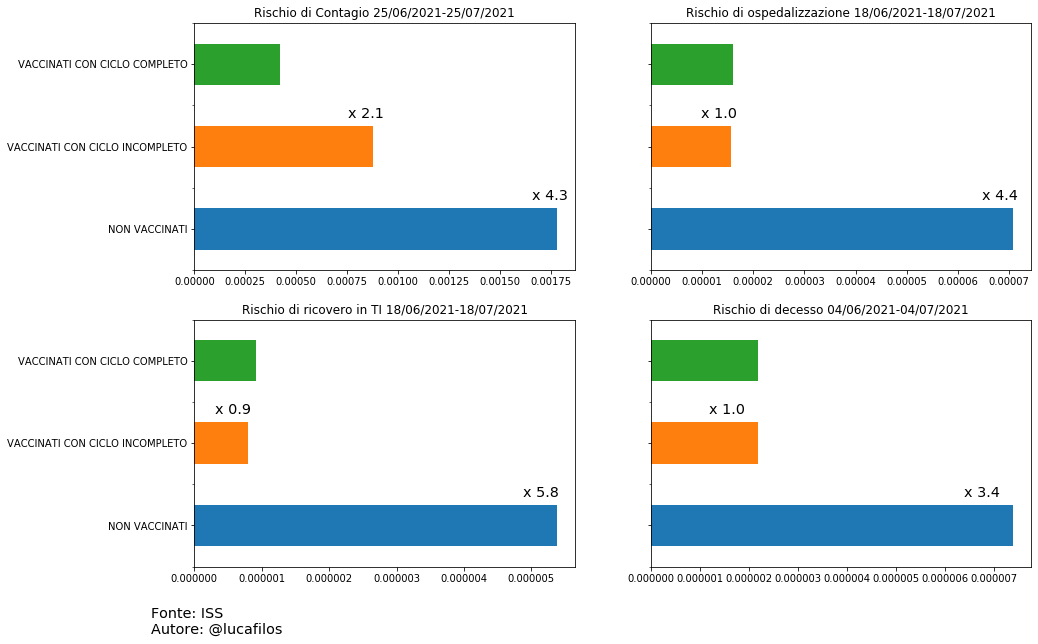

In [102]:
fig, ax = plt.subplots(2,2, figsize = (15,10), sharey = True)
Rischio_contagio.iloc[:,0].plot.barh(rot = 0, ax = ax[0,0], legend = False)
Rischio_osped.iloc[:,0].plot.barh(rot = 0, ax = ax[0,1], legend = False)
Rischio_TI.iloc[:,0].plot.barh(rot = 0, ax = ax[1,0], legend = False)
Rischio_decesso.iloc[:,0].plot.barh(rot = 0, ax = ax[1,1], legend = False)


ax[0,0].set_xlabel('')
ax[0,0].set_title(f'Rischio di Contagio {Diag_data}', fontsize = 'large')

for i, v in enumerate(Rischio_contagio.iloc[:-1,0]):
    label = Rischio_contagio.iloc[i,1]
    ax[0,0].text(v-0.00012, i+0.35, f'x {label:.1f}', color = 'black', fontsize = 'x-large')


ax[0,1].set_xlabel('')
ax[0,1].set_title(f'Rischio di ospedalizzazione {Osp_data}', fontsize = 'large')

for i, v in enumerate(Rischio_osped.iloc[:-1,0]):
    label = Rischio_osped.iloc[i,1]
    ax[0,1].text(v-0.000006, i+0.35, f'x {label:.1f}', color = 'black', fontsize = 'x-large')

ax[1,0].set_xlabel('')
ax[1,0].set_title(f'Rischio di ricovero in TI {TI_data}', fontsize = 'large')

for i, v in enumerate(Rischio_TI.iloc[:-1,0]):
    label = Rischio_TI.iloc[i,1]
    ax[1,0].text(v-0.0000005, i+0.35, f'x {label:.1f}', color = 'black', fontsize = 'x-large')

ax[1,1].set_xlabel('')
ax[1,1].set_title(f'Rischio di decesso {Dec_data}', fontsize = 'large')

for i, v in enumerate(Rischio_decesso.iloc[:-1,0]):
    label = Rischio_decesso.iloc[i,1]
    ax[1,1].text(v-0.000001, i+0.35, f'x {label:.1f}', color = 'black', fontsize = 'x-large')
    
plt.annotate('Fonte: ISS \nAutore: @lucafilos', (0,0), (-500,-40), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')